In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

def visualize_image_with_boxes(image_path, label_path):
    """
    Charge une image et affiche les bounding boxes correspondantes.
    """
    if not os.path.exists(image_path):
        print(f"⚠️ Image non trouvée : {image_path}")
        return

    if not os.path.exists(label_path):
        print(f"⚠️ Pas d'annotations pour cette image : {label_path}")
        return

    # Charger l'image
    image = cv2.imread(image_path)
    height, width, _ = image.shape  # Obtenir dimensions

    # Lire l'annotation convertie
    with open(label_path, "r") as file:
        lines = file.readlines()

    for line in lines:
        values = list(map(float, line.split()))
        class_id = int(values[0])  # Class ID (pas utilisé ici)
        x_center, y_center, w, h = values[1:]  # Bounding box YOLO

        # Convertir coordonnées normalisées en pixels
        x1 = int((x_center - w / 2) * width)
        y1 = int((y_center - h / 2) * height)
        x2 = int((x_center + w / 2) * width)
        y2 = int((y_center + h / 2) * height)

        # Dessiner le rectangle sur l'image
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Convertir BGR en RGB pour affichage avec Matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Afficher l'image avec les annotations
    plt.figure(figsize=(8, 6))
    plt.imshow(image_rgb)
    plt.axis("off")
    plt.title(f"Annotations de {os.path.basename(image_path)}")
    plt.show()

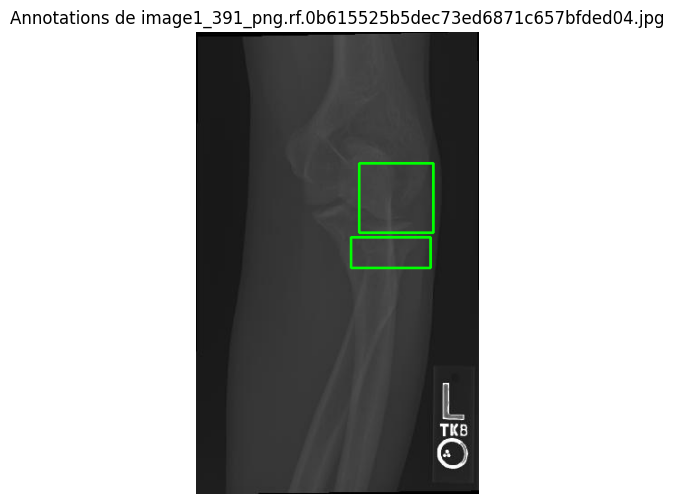

In [ ]:
label_path = '...'
image_path = '...'
visualize_image_with_boxes(image_path, label_path)